### Imports

In [1]:
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
tf.InteractiveSession()

### Generating Data

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D), dtype='float32') # data matrix (each row = single example)
y = np.zeros(N*K, dtype='int32') # class labels

In [4]:
for j in xrange(K):
    indices = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[indices] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[indices] = j

In [5]:
ohe = LabelBinarizer()
y_binary = ohe.fit_transform(y)

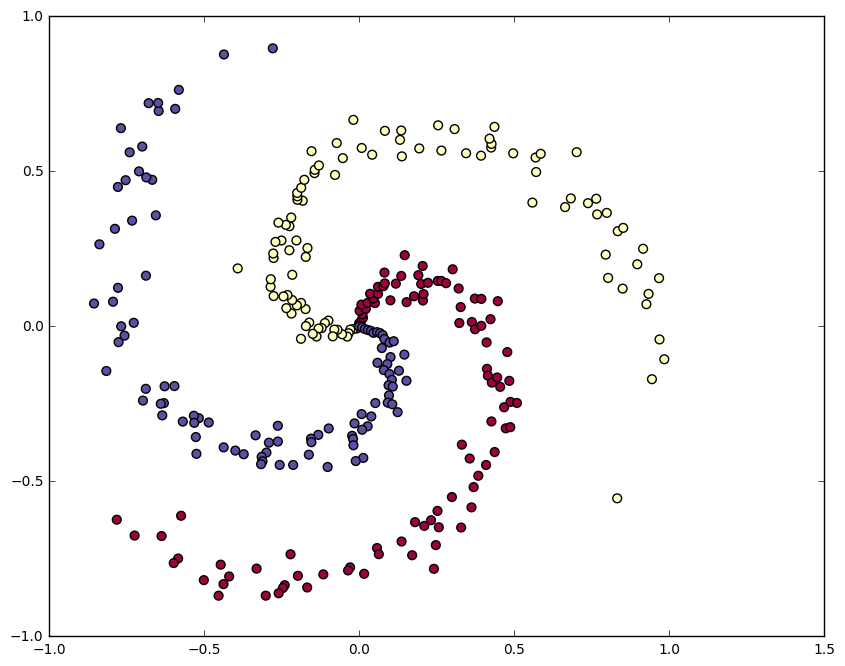

In [6]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

### Training a softmax classifier

#### Define placeholders for X and y inputs

In [7]:
X_input = tf.placeholder(tf.float32, shape=X.shape)
y_input = tf.placeholder(tf.float32, shape=y_binary.shape)

#### Initialize weights and bias

In [8]:
# initialize weights
W = tf.get_variable("weights", (D,K), initializer=tf.random_normal_initializer())
# initialize bias
b = tf.get_variable("bias", (1,K), initializer=tf.random_normal_initializer())

#### Compute loss

In [9]:
# compute class scores (dim = (N*K,K))
scores = tf.matmul(X_input, W) + b
# normalize scores to probabilities (dim = (N*K,K))
probabilities = tf.exp(scores)/tf.reduce_sum(tf.exp(scores), reduction_indices=1, keep_dims=True)
# extract correct class probabilities (dim = (N*K,1))
correct_logprobas = -(y_input * tf.log(probabilities))
# compute the data loss
data_loss = tf.reduce_sum(correct_logprobas)/(N*K)
# compute the regularization loss
reg_lambda = 1
regularization_loss = 0.5*reg_lambda*tf.reduce_sum(W*W)
loss = data_loss + regularization_loss

#### Define the loss optimizer

In [10]:
opt = tf.train.GradientDescentOptimizer(1e-0)
opt_operation = opt.minimize(loss)

#### Train and calculate accuracy

In [11]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in range(500):
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X_input: X, y_input: y_binary})    
    scores = tf.matmul(X,W) + b
    predicted_class = tf.argmax(scores,1)
    print 'training accuracy: %.2f' % (np.mean(predicted_class.eval() == y))
    print("----------Weights---------")
    print(sess.run([W]))

training accuracy: 0.54
----------Weights---------
[array([[ 0.03963081,  0.0512507 , -0.09088154],
       [-0.08217616,  0.09520487, -0.01302874]], dtype=float32)]
